In [ ]:
test234

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
def_df = pd.read_csv('Data/def_df.csv')
play_df = pd.read_csv('Data/play_df.csv')
off_df = pd.read_csv('Data/off_df.csv')
merged_df = pd.read_csv('Data/merged_df.csv')

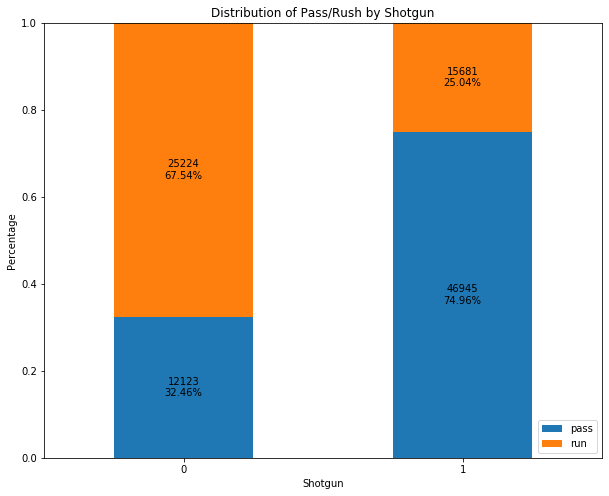

In [48]:
#get the number of pass/rush by shotgun
grouped = merged_df.groupby(['shotgun']).agg({'play_type': 'value_counts'}).unstack()

# turn them into percentages
normed = grouped.div(grouped.sum(axis=1), axis=0)

# reset the columns index
normed.columns = normed.columns.droplevel(0)

# plot
ax = normed.plot(kind='bar',
                 stacked=True,
                 title='Distribution of Pass/Rush by Shotgun',
                 ylim=(0, 1),
                 figsize=(10, 8),
                 rot=0,
                 )
plt.legend(loc='lower right')
plt.ylabel('Percentage')
plt.xlabel('Shotgun')

group_flattened = grouped.T.values.flatten()
norm_flattened = normed.T.values.flatten() * 100

for i, p in enumerate(ax.patches):
    # place pass/rush counts in the bar itself
    ax.annotate('{}\n{:.2f}%'.format(group_flattened[i], norm_flattened[i]),
                xy=(0.5, 0.5),
                xycoords=p,
                ha='center',
                va='center',
                )
    
#Save the figure as a png
plt.savefig('pr_shot.png', dpi=400)

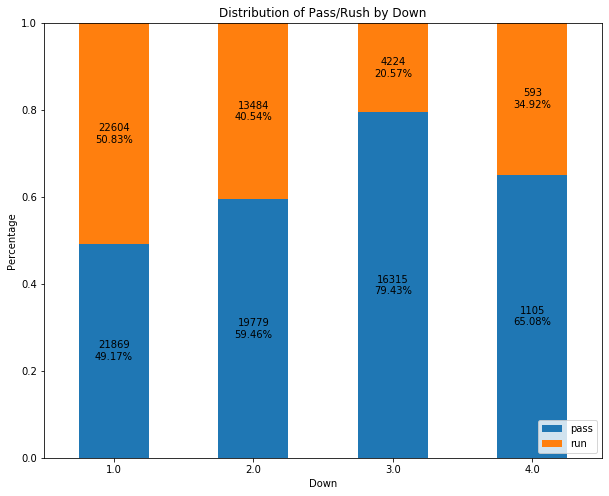

In [47]:
# get the number of pass/rush by down
grouped = merged_df.groupby(['down']).agg({'play_type': 'value_counts'}).unstack()

# turn them into percentages
normed = grouped.div(grouped.sum(axis=1), axis=0)

# reset the columns index
normed.columns = normed.columns.droplevel(0)

# plot
ax = normed.plot(kind='bar',
                 stacked=True,
                 title='Distribution of Pass/Rush by Down',
                 ylim=(0, 1),
                 figsize=(10, 8),
                 rot=0,
                 )
plt.legend(loc='lower right')
plt.ylabel('Percentage')
plt.xlabel('Down')

group_flattened = grouped.T.values.flatten()
norm_flattened = normed.T.values.flatten() * 100

for i, p in enumerate(ax.patches):
    # place pass/rush counts in the bar itself
    ax.annotate('{}\n{:.2f}%'.format(group_flattened[i], norm_flattened[i]),
                xy=(0.5, 0.5),
                xycoords=p,
                ha='center',
                va='center',
                )

#Save the figure as a png
plt.savefig('pr_down.png', dpi=400)

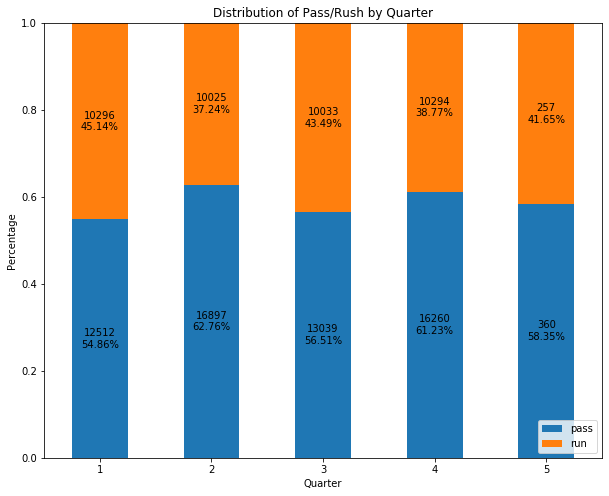

In [46]:
# get the number of pass/rush by down
grouped = merged_df.groupby(['qtr']).agg({'play_type': 'value_counts'}).unstack()

# turn them into percentages
normed = grouped.div(grouped.sum(axis=1), axis=0)

# reset the columns index
normed.columns = normed.columns.droplevel(0)

# plot
ax = normed.plot(kind='bar',
                 stacked=True,
                 title='Distribution of Pass/Rush by Quarter',
                 ylim=(0, 1),
                 figsize=(10, 8),
                 rot=0,
                 )
plt.legend(loc='lower right')
plt.ylabel('Percentage')
plt.xlabel('Quarter')

group_flattened = grouped.T.values.flatten()
norm_flattened = normed.T.values.flatten() * 100

for i, p in enumerate(ax.patches):
    # place pass/rush counts in the bar itself
    ax.annotate('{}\n{:.2f}%'.format(group_flattened[i], norm_flattened[i]),
                xy=(0.5, 0.5),
                xycoords=p,
                ha='center',
                va='center',
                )

#Save the figure as a png
plt.savefig('pr_qtr.png', dpi=400)

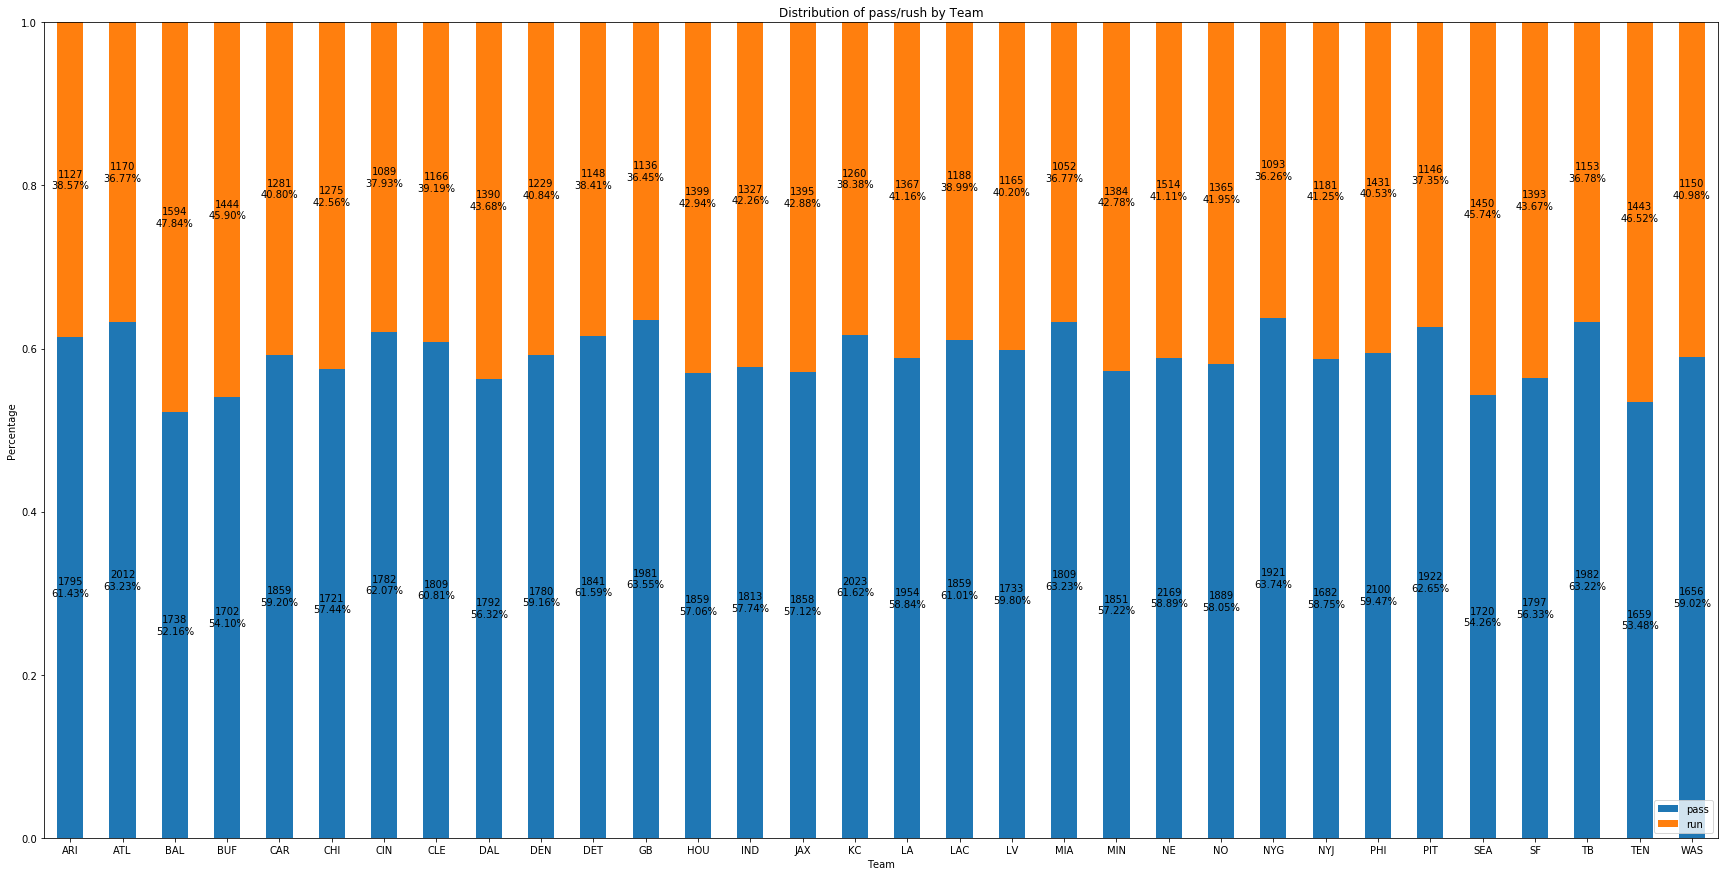

In [45]:
# get the number of pass/rush by team
grouped = merged_df.groupby(['posteam']).agg({'play_type': 'value_counts'}).unstack()

# turn them into percentages
normed = grouped.div(grouped.sum(axis=1), axis=0)

# reset the columns index
normed.columns = normed.columns.droplevel(0)

# plot
ax = normed.plot(kind='bar',
                 stacked=True,
                 title='Distribution of pass/rush by Team',
                 ylim=(0, 1),
                 figsize=(30, 15),
                 rot=0,
                 )
plt.legend(loc='lower right')
plt.ylabel('Percentage')
plt.xlabel('Team')

group_flattened = grouped.T.values.flatten()
norm_flattened = normed.T.values.flatten() * 100

for i, p in enumerate(ax.patches):
    # place pass/rush counts in the bar itself
    ax.annotate('{}\n{:.2f}%'.format(group_flattened[i], norm_flattened[i]),
                xy=(0.5, 0.5),
                xycoords=p,
                ha='center',
                va='center',
                )
    
#Save the figure as a png
plt.savefig('pr_team.png', dpi=400)

In [4]:
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.5)

In [5]:
logos = os.listdir(os.getcwd() + '/logos')

logo_paths = []

for i in logos:
    logo_paths.append(os.getcwd() + '/logos/' + str(i))

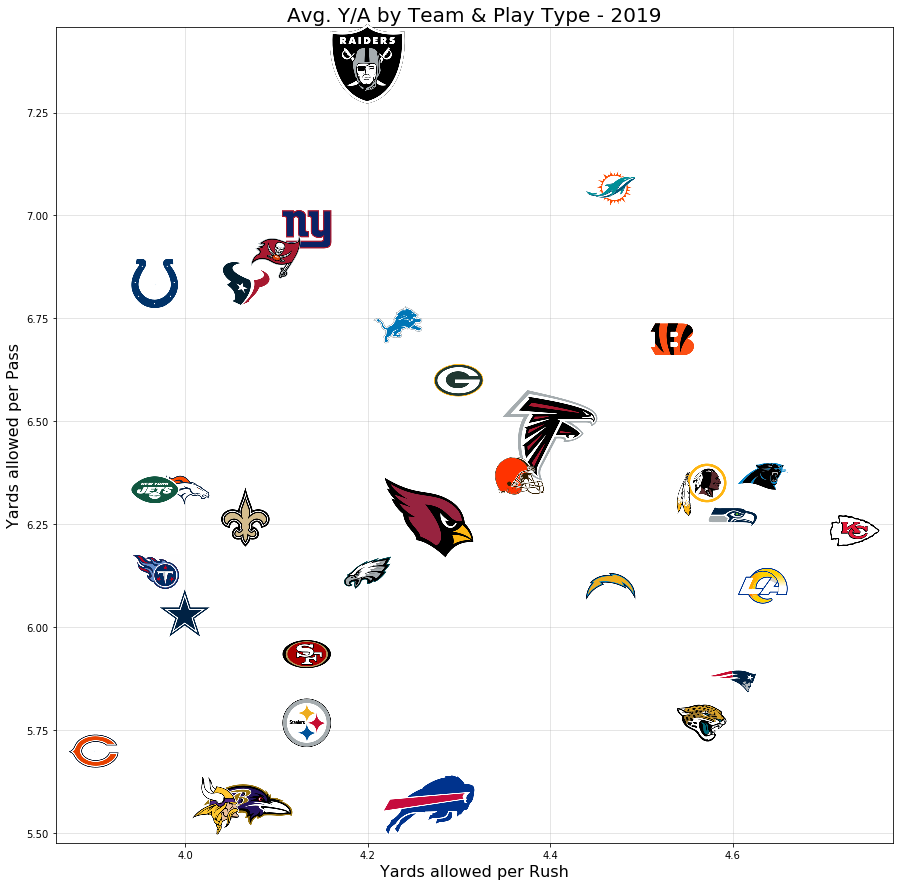

In [42]:
#Filter to pass plays and groupby defensive team
team_def = def_df.groupby('Def_Tm')[['Def_NY/A']].mean()

#Do the same but for rushing plays
team_def['rush_ya'] = def_df.groupby('Def_Tm')[['Def_Y/A']].mean()

#Define x and y
x = team_def.rush_ya
y = team_def['Def_NY/A']

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(15,15))

#Make a scatter plot first to get the points to place logos
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text
ax.set_xlabel('Yards allowed per Rush', fontsize=16)
ax.set_ylabel('Yards allowed per Pass', fontsize=16)
ax.set_title('Avg. Y/A by Team & Play Type - 2019', fontsize=20)

#Save the figure as a png
plt.savefig('team_def.png', dpi=400)


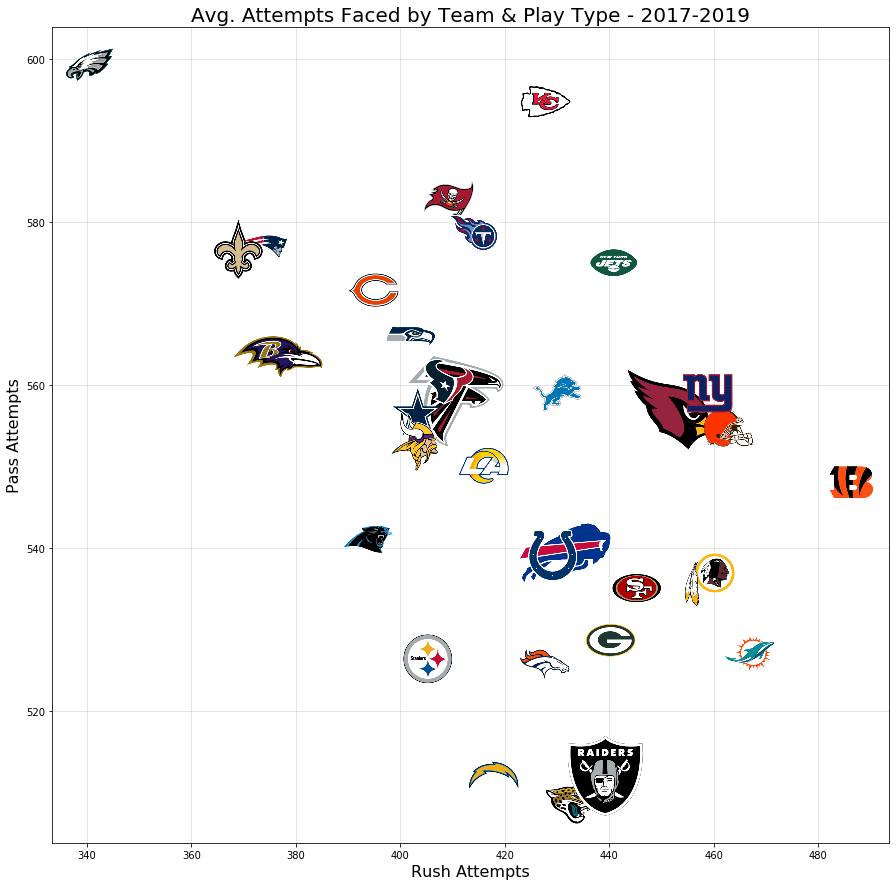

In [8]:
#Filter to pass plays and groupby defensive team
att = def_df.groupby('Def_Tm')[['Def_Att_Pass']].mean()

#Do the same but for rushing plays
att['rush_ya'] = def_df.groupby('Def_Tm')[['Def_Att_Rush']].mean()

#Define x and y
x = att.rush_ya
y = att['Def_Att_Pass']

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(15,15))

#Make a scatter plot first to get the points to place logos
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text
ax.set_xlabel('Rush Attempts', fontsize=16)
ax.set_ylabel('Pass Attempts', fontsize=16)
ax.set_title('Avg. Attempts Faced by Team & Play Type - 2017-2019', fontsize=20)

#Save the figure as a png
plt.savefig('team_att.png', dpi=400)

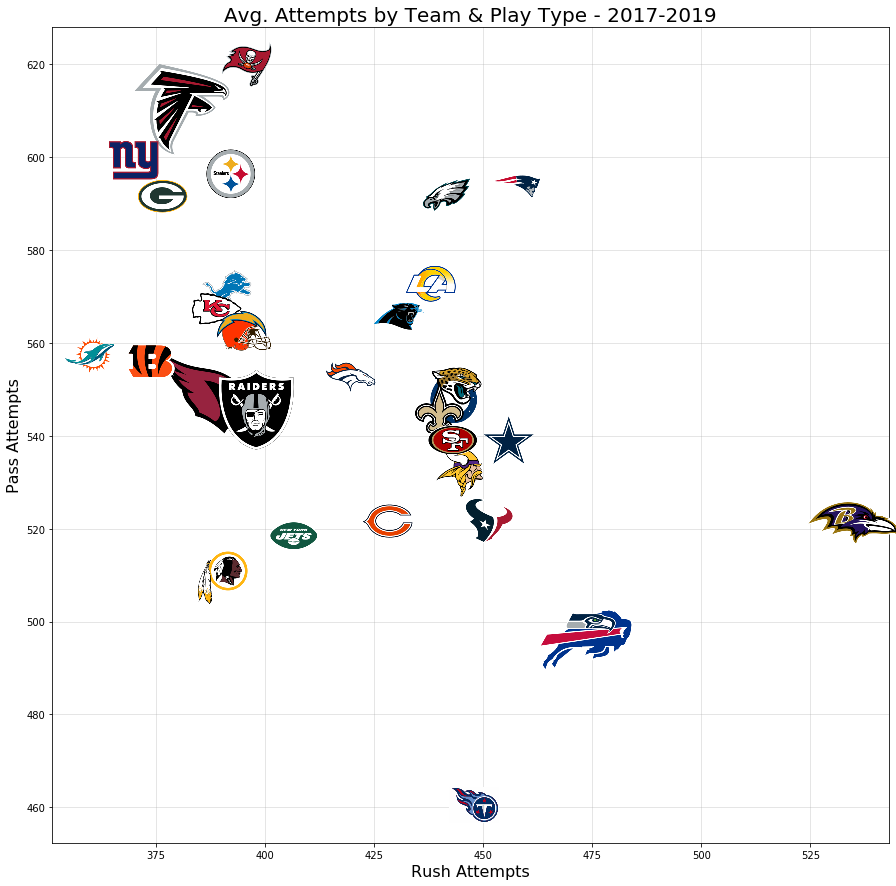

In [10]:
#Filter to pass plays and groupby defensive team
att2 = off_df.groupby('Off_Tm')[['Off_Att_Pass']].mean()

#Do the same but for rushing plays
att2['rush_ya'] = off_df.groupby('Off_Tm')[['Off_Att_Rush']].mean()

#Define x and y
x = att2.rush_ya
y = att2['Off_Att_Pass']

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(15,15))

#Make a scatter plot first to get the points to place logos
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text
ax.set_xlabel('Rush Attempts', fontsize=16)
ax.set_ylabel('Pass Attempts', fontsize=16)
ax.set_title('Avg. Attempts by Team & Play Type - 2017-2019', fontsize=20)

#Save the figure as a png
plt.savefig('team_att_off.png', dpi=400)